In [1]:
from fastai import *

In [4]:
from fastai.vision import *

In [6]:
import fastai

In [8]:
from fastai.core import *

In [10]:
path = Path('imgs')

In [27]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=224)

In [25]:
# data = ImageDataBunch.from_folder(path)

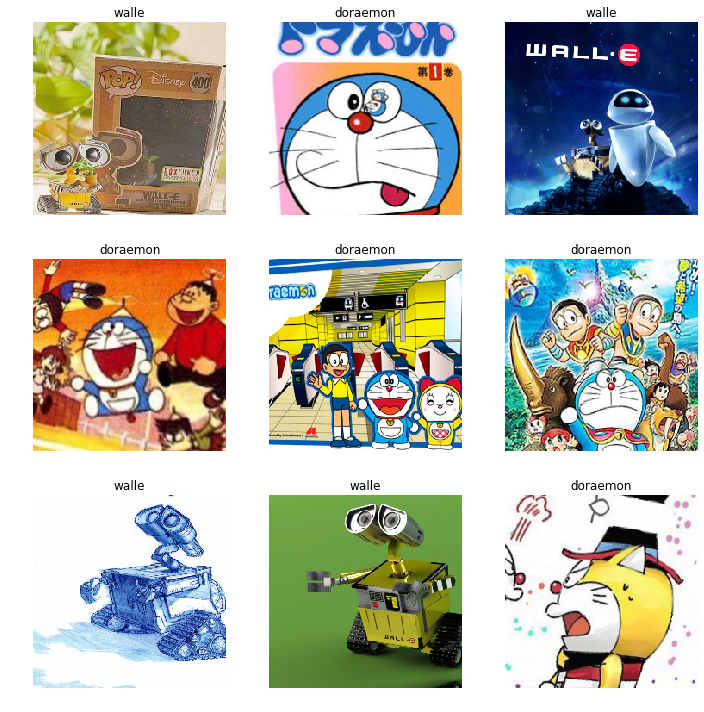

In [28]:
data.show_batch(rows=3, figsize=(10,10))

In [34]:
img,label = data.valid_ds[-1]

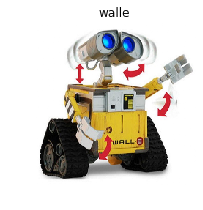

In [37]:
img.show(title=data.classes[label])